### MACHINE LEARNING PROJECT CHECKLIST
- [x] Reframe the problem and look to the big picture
- [x] Get the data
- [x] Explore the data
- [x] Prepare the data
- [x] Explore different models and shortlist the best ones
- [x] Fine-tune the models and combine them
- [ ] Present the solution - Launch, monitor and mantain

In [20]:
import os
import tarfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
DATASETS_PATH = os.getenv('DATASETS_PATH','..\\..\\datasets')
HOUSING_PATH = os.path.join(DATASETS_PATH, "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [22]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True) # Creates the work directory if not exists
    tgz_path=os.path.join(housing_path, "housing.tgz") # Path of the destination file
    urllib.request.urlretrieve(housing_url,tgz_path) # File download 
    
    # Extraction of the compressed file
    housing_tgz = tarfile.open(tgz_path) 
    housing_tgz.extractall(housing_path)
    housing_tgz.close()

# Execution
fetch_housing_data()

In [23]:
#Load data as panda dataframe
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path =os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing["ocean_proximity"].value_counts() #Distinct values of categorical column ocean_proximity

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.info() # Type info of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing.describe() #Simple metrics of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


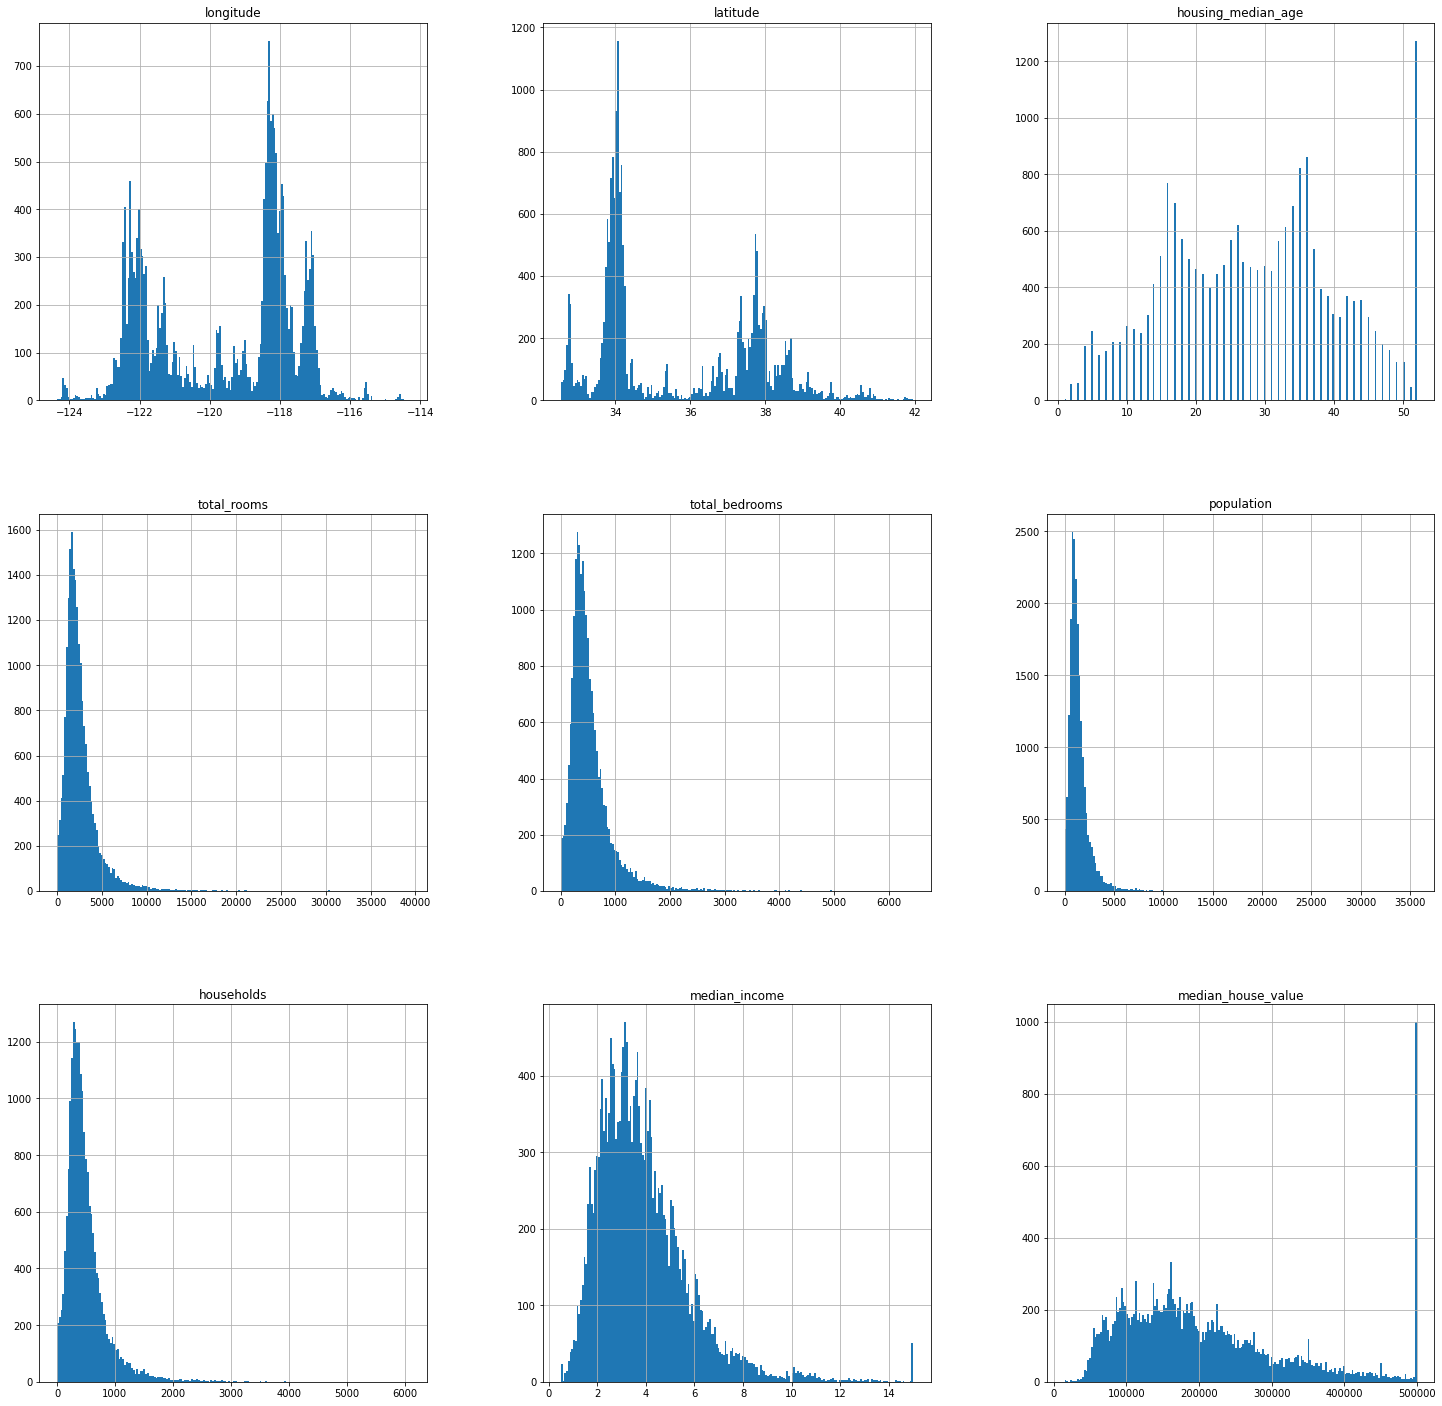

In [12]:
housing.hist(bins=200,figsize=(25,25)) #Hist of the data. Bins = numer of hist columns
plt.show()

## DATASET SPLIT INTO:
* Train set
* Test set

In [13]:
# Implementation of set split bu random shuffling
def split_train_set(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data)) # List of random permutation of the indices
    test_set_size = int(len(data)*test_ratio) # Size of the test set given the percentage
    test_indices = shuffled_indices[:test_set_size] # List of shuffled indices
    train_indices = shuffled_indices[test_set_size:] # List of shuffled indices
    return data.iloc[train_indices], data.iloc[test_indices] # Data values from indices

In [14]:
train_set, test_set = split_train_set(housing, 0.2)
print(len(train_set)+len(test_set) == len(housing))
test_set.head()

True


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6072,-117.85,34.08,23.0,1160.0,166.0,467.0,178.0,8.1050,386200.0,<1H OCEAN
14780,-117.09,32.57,23.0,1817.0,323.0,1371.0,327.0,3.6736,139500.0,NEAR OCEAN
15068,-116.97,32.78,37.0,1255.0,238.0,671.0,278.0,3.7019,138600.0,<1H OCEAN
2888,-118.99,35.39,36.0,1438.0,348.0,1054.0,341.0,1.8319,55400.0,INLAND
18820,-120.24,39.67,52.0,296.0,63.0,143.0,56.0,3.6250,68600.0,INLAND


In [15]:
from zlib import crc32

# Checks if the identifier hash is lower that the percentage hash 
# NOTES: & stands for bitwise AND operation and 0xffffffff represents -1
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32 

def split_test_train_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
housing_with_id = housing.reset_index()
train_set, test_set = split_test_train_by_id(housing_with_id, 0.2, "index")
print(len(train_set)+len(test_set) == len(housing))
test_set.head()

True


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [17]:
#Using the already implemented functions in sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set)+len(test_set) == len(housing))
test_set.head()

True


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


We know the median income is a strong feature to forecast the house price. We categorize it in order to set the same distribution to the test set

<AxesSubplot:>

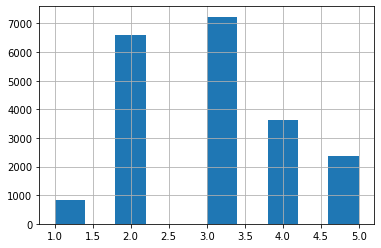

In [19]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0.,1.5,3.0,4.5,6., np.inf],
                              labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
# STRATIFICATION VS RANDOM 

random_test_set = test_set.copy()
random_test_set["income_cat"]=pd.cut(random_test_set["median_income"],
                              bins=[0.,1.5,3.0,4.5,6., np.inf],
                              labels=[1,2,3,4,5])

global_percent=housing["income_cat"].value_counts()/len(housing)*100
strat_percent=strat_test_set["income_cat"].value_counts()/len(strat_test_set)*100
random_percent=random_test_set["income_cat"].value_counts()/len(random_test_set)*100

strat_abs_error = np.abs(global_percent-strat_percent)
rand_abs_error = np.abs(global_percent-random_percent)
strat_rel_error = strat_abs_error/global_percent*100
rand_rel_error = rand_abs_error/global_percent*100

data= {'Global(%)': global_percent, 'Strat(%)': strat_percent, 'Rand(%)': random_percent, 
#       'Strat abs error': strat_abs_error, 'Rand abs error': rand_abs_error,
       'Strat rel error(%)': strat_rel_error, 'Rand rel error(%)': rand_rel_error}

df=pd.DataFrame(data).sort_index()
df

,Global(%),Strat(%),Rand(%),Strat rel error(%),Rand rel error(%)
1,3.982558,3.972868,4.021318,0.243309,0.973236
2,31.884690,31.879845,32.437016,0.015195,1.732260
3,35.058140,35.053295,35.852713,0.013820,2.266446
4,17.630814,17.635659,16.739341,0.027480,5.056334
5,11.443798,11.458333,10.949612,0.127011,4.318374


In [22]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Visualizing data

In [23]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

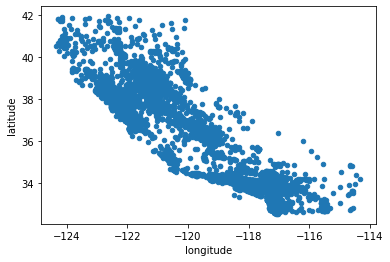

In [24]:
housing.plot(kind= "scatter", x="longitude", y="latitude" )

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

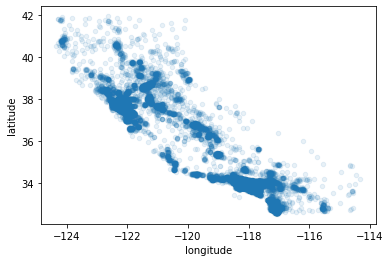

In [25]:
#alpha sets opacity as a function of data density (the less density, the less opacity)
housing.plot(kind= "scatter", x="longitude", y="latitude", alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

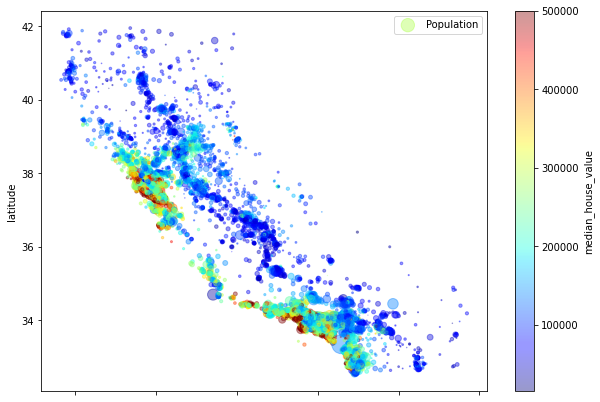

In [26]:
housing.plot(kind= "scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label = "Population",
            figsize= (10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [27]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

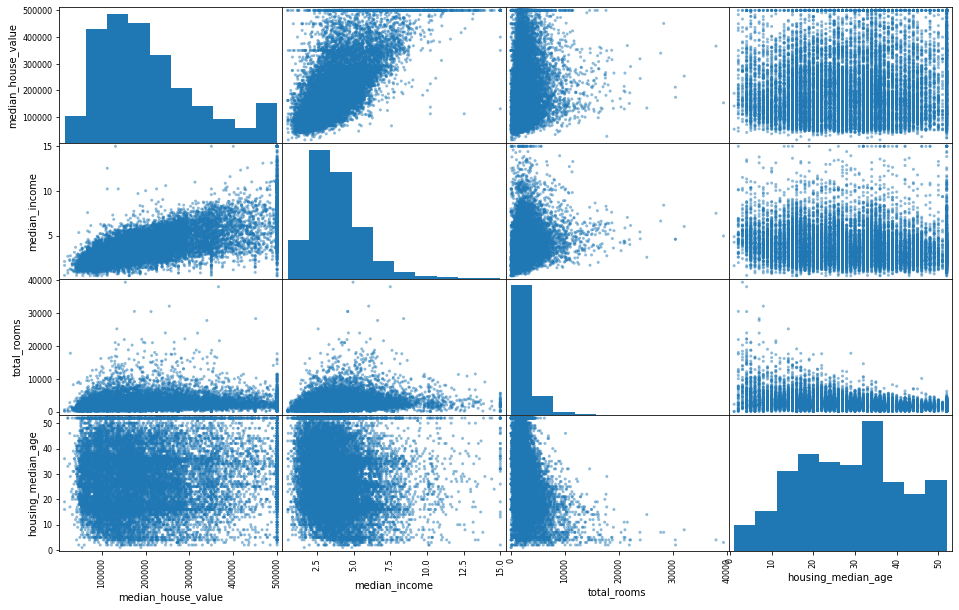

In [29]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize= (16,10))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

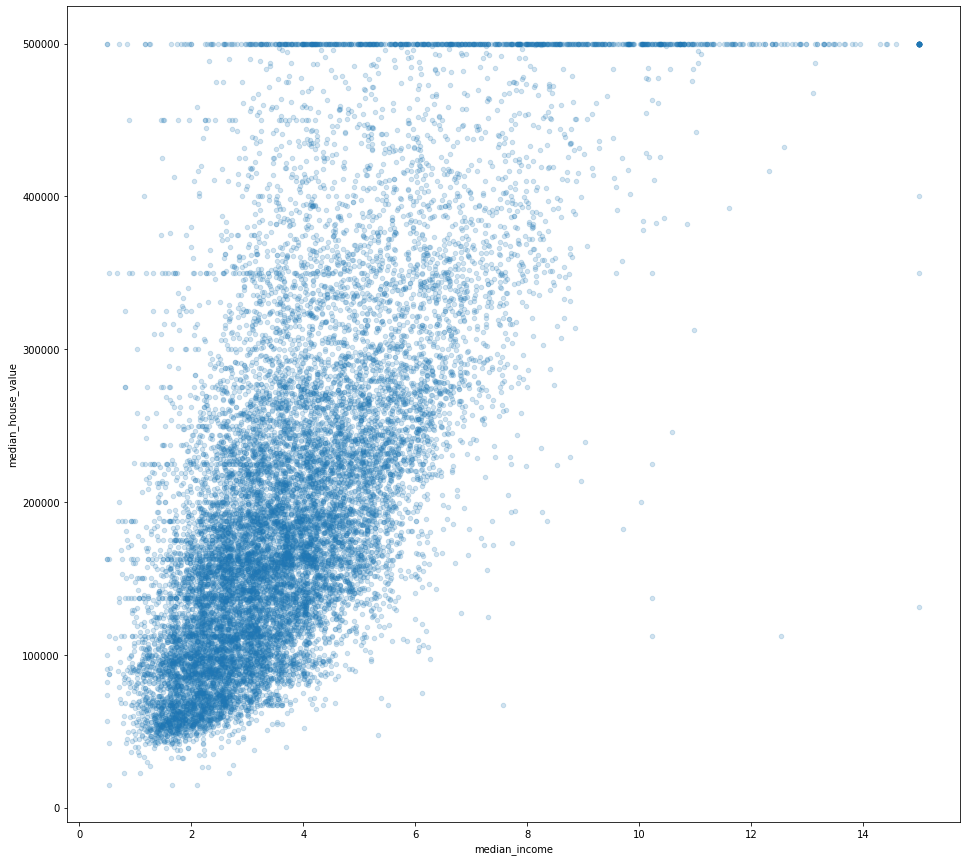

In [30]:
housing.plot(kind="scatter", x ="median_income", y= "median_house_value", alpha = 0.2, figsize=(16,15))

In [31]:
housing["rooms_per_household"]= housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]= housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]= housing["population"]/housing["households"]



In [32]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### PREPARE DATA FOR MACHINE LEARNING ALGORITHMS

1. Manage total_bedrooms null values. Alternatives:
 * Drop column
 * Drop corresponding districts
 * Fill null values with an estimator (E.g. the median)

In [33]:
housing=strat_train_set.drop("median_house_value", axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [34]:
#The three alternatives. We choose the 3rd
housing.drop("total_bedrooms", axis=1) #Drop column
housing.dropna(subset=["total_bedrooms"]) #Drop null-value records
median=housing["total_bedrooms"].median() #Fill the null values
housing["total_bedrooms"].fillna(median, inplace=True)

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imputer = SimpleImputer(strategy="median")

In [37]:
housing_num=housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
print(imputer.statistics_)
print(housing_num.median().values)
print(imputer.statistics_ == housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[ True  True  True  True  True  True  True  True]


In [38]:
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


2. Handling Text and categorical attributes

In [39]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [40]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]


array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [41]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot #Sparse matrix. Since it is almost empty, only stores non zero values

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
housing_cat_1hot.toarray() #To convert it to a full Numpy matrix


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [44]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Transformers

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self #Nothing else to do here
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix]/X[:,households_ix]
        population_per_household = X[:, population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    


In [46]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_adder.transform(housing.values)
housing_extra_attributes

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

#### PIPELINES

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [49]:
from sklearn.compose import ColumnTransformer

In [50]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### SELECT AND TRAIN MODEL
    1. Linear regression
    2. Decision Tree regresion
    3. Random Forest regresion

In [51]:
# Linear regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [52]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Expected:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Expected: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [53]:
from sklearn.metrics import mean_squared_error

housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [54]:
# Decission Tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels) 

DecisionTreeRegressor()

In [55]:
housing_prediction = tree_reg.predict(some_data_prepared)
lin_mse = mean_squared_error(some_labels, housing_prediction)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [56]:
# Cross validation to evaluate the overfitting
from sklearn.model_selection import cross_val_score

tree_scores=cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

lin_scores=cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [57]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard deviation:", scores.std())

print('Tree scores:')
display_scores(tree_rmse_scores)
print('Linear scores:')
display_scores(lin_rmse_scores)

Tree scores:
Scores: [68719.26060345 67483.35305656 69789.03492264 68011.2656702
 71086.37298323 75514.89465103 71499.25734843 71437.86825799
 77101.65560214 69963.92339474]
Mean 71060.68864904132
Standard deviation: 2950.7133450038673
Linear scores:
Scores: [66744.3077004  66963.34447627 70349.03798867 74745.98048469
 68031.13388938 71193.84183426 64968.10170457 68281.61137997
 71555.07998996 67665.10082067]
Mean 69049.75402688305
Standard deviation: 2736.4552480969305


In [58]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

scores=cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

#print(display_scores(tree_rmse_scores))
#print(display_scores(lin_rmse_scores))
display_scores(forest_rmse_scores)

Scores: [49742.85036607 47574.93670344 49798.48667281 52020.00976945
 49293.98830051 53052.87738117 48860.56887418 47684.11155923
 52882.51140757 50102.75972552]
Mean 50101.31007599369
Standard deviation: 1864.5389419924313


### Fine-Tune
    1. Grid Search
    2. Randomized search
    3. Ensamble methods

* Best models and errors
* Evaluation on test set

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators' :[3,10],'max_features':[2,3,4]}
]

forest_reg =RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [61]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [62]:
cvres =grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64023.16482250389 {'max_features': 2, 'n_estimators': 3}
55767.78363545723 {'max_features': 2, 'n_estimators': 10}
52745.437449312325 {'max_features': 2, 'n_estimators': 30}
61087.381030212564 {'max_features': 4, 'n_estimators': 3}
53075.25656259997 {'max_features': 4, 'n_estimators': 10}
50662.078796747744 {'max_features': 4, 'n_estimators': 30}
59271.7818452915 {'max_features': 6, 'n_estimators': 3}
52503.05670870539 {'max_features': 6, 'n_estimators': 10}
50053.41065017927 {'max_features': 6, 'n_estimators': 30}
58154.68176478592 {'max_features': 8, 'n_estimators': 3}
52292.17982406255 {'max_features': 8, 'n_estimators': 10}
50270.38636029935 {'max_features': 8, 'n_estimators': 30}
62141.218611408236 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54417.71013228456 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59842.348751304606 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53077.3451954631 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [63]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators' :[3,10],'max_features':[2,3,4]}
]

forest_reg =RandomForestRegressor()

#Running for 15 of the 18 availables iterations
rand_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, 
                                 scoring='neg_mean_squared_error', return_train_score=True, n_iter=15)
rand_search.fit(housing_prepared, housing_labels, )

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
rand_search.best_params_

{'n_estimators': 30, 'max_features': 6}

In [65]:
rand_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [66]:
cvres =rand_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

60667.34387578121 {'n_estimators': 3, 'max_features': 4}
58717.93335867415 {'n_estimators': 3, 'max_features': 8}
49867.45743092691 {'n_estimators': 30, 'max_features': 6}
53939.82864747565 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
52368.64646754663 {'n_estimators': 10, 'max_features': 8}
62646.99793173243 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
55487.51814312384 {'n_estimators': 10, 'max_features': 2}
51907.59770174666 {'n_estimators': 10, 'max_features': 4, 'bootstrap': False}
52540.91358968582 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
51532.419800281816 {'n_estimators': 10, 'max_features': 6}
53044.30025734364 {'n_estimators': 30, 'max_features': 2}
64216.76188930528 {'n_estimators': 3, 'max_features': 2}
50020.2252422237 {'n_estimators': 30, 'max_features': 8}
60115.70417937796 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
58355.05971857641 {'n_estimators': 3, 'max_features': 4, 'bootstrap': False}


In [67]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.69274214e-02, 6.99813856e-02, 4.14748381e-02, 1.75444910e-02,
       1.57776030e-02, 1.74927672e-02, 1.61695520e-02, 3.38733022e-01,
       5.90368340e-02, 1.04212754e-01, 6.94468453e-02, 1.17933412e-02,
       1.53689466e-01, 1.62279114e-05, 3.00754033e-03, 4.69591097e-03])

In [68]:
extra_attribs=["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes),reverse=True)

[(0.3387330220958812, 'median_income'),
 (0.15368946570566813, 'INLAND'),
 (0.10421275420364944, 'pop_per_hhold'),
 (0.07692742144190992, 'longitude'),
 (0.06998138558873249, 'latitude'),
 (0.06944684526251414, 'bedrooms_per_room'),
 (0.059036834018436186, 'rooms_per_hhold'),
 (0.04147483807087029, 'housing_median_age'),
 (0.017544491017653766, 'total_rooms'),
 (0.01749276720514482, 'population'),
 (0.016169552004000637, 'households'),
 (0.01577760300553884, 'total_bedrooms'),
 (0.011793341172004925, '<1H OCEAN'),
 (0.0046959109712900945, 'NEAR OCEAN'),
 (0.003007540325306355, 'NEAR BAY'),
 (1.622791139883791e-05, 'ISLAND')]

In [69]:
final_model = grid_search.best_estimator_

housing_test=strat_test_set.drop("median_house_value", axis=1)
housing_labels_test=strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(housing_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(housing_labels_test, final_predictions)

final_rmse = np.sqrt(final_mse)
final_rmse

47808.7396911953

## APPENDIX: SAVE AND LOAD MODELS

In [71]:
import joblib
housing_models_path = os.path.join(os.getenv('MODELS_PATH','..\\..\\models'),"housing")
os.makedirs(housing_models_path, exist_ok=True) # Creates the work directory if not exists
joblib.dump(final_model,os.path.join(housing_models_path,"final_model.pkl"))

['C:\\Users\\julian\\Documents\\PC_JULIAN\\PYTHON\\JUPYTER\\Ageron\\models\\housing\\final_model.pkl']

In [72]:
final_model = None
print(final_model)

None


In [74]:
#Load trained models and test in test set
forest_model = joblib.load(os.path.join(housing_models_path,"final_model.pkl"))

In [75]:
housing_test_prediction = forest_model.predict(X_test_prepared)

test_mse = mean_squared_error(housing_labels_test, housing_test_prediction)

test_rmse = np.sqrt(test_mse)
test_rmse

47808.7396911953